In [60]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - results: a dictionary of results from different learners
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize=(11, 7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000', '#00A0A0', '#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in range(3):  # Use range() for integer values
                # Creative plot code
                ax[j // 3, j % 3].bar(i + k * bar_width, results[learner][i][metric], width=bar_width, color=colors[k])
                ax[j // 3, j % 3].set_xticks([0.45, 1.45, 2.45])
                ax[j // 3, j % 3].set_xticklabels(["5%", "20%", "100%"])
                ax[j // 3, j % 3].set_xlabel("Training Set Size")
                ax[j // 3, j % 3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y=accuracy, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[1, 1].axhline(y=accuracy, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[0, 2].axhline(y=f1, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[1, 2].axhline(y=f1, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim(0, 1)
    ax[0, 2].set_ylim(0, 1)
    ax[1, 1].set_ylim(0, 1)
    ax[1, 2].set_ylim(0, 1)

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color=colors[i], label=learner))
    plt.legend(handles=patches, bbox_to_anchor=(-0.80, 2.53), loc='upper center', borderaxespad=0., ncol=3, fontsize='x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize=16, y=1.10)
    plt.tight_layout()
    plt.show()

# Usage example
# Call evaluate function with your results, accuracy, and f1 values
# evaluate(results, accuracy, fscore)


In [61]:
import sys
sys.path.insert(1, "/kaggle/input/sample1/visuals.py")

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import sys as vs


#Import supplementary visualization code visuals.py
#import visuals as vs

# Display all visuals inline
%matplotlib inline

# Load the Banknote Authentication dataset
data = pd.read_csv("/kaggle/input/sample1/banknote_authentication.csv")
display(data.head(n=6))

classes = data['class']
features = data.drop('class', axis=1)

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0
5,4.36840,9.6718,-3.9606,-3.16250,0


In [63]:

# autoreload for automatically reloading changes made in visuals.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
n_records = len(data)
n_fake_notes = len(data[data['class'] == 0])
n_real_notes = len(data[data['class'] == 1])
print ("Total number of records: {}".format(n_records))
print ("Total number of fake notes: {}".format(n_fake_notes))
print ("Total number of real notes: {}".format(n_real_notes))

missing_values = data.isnull().sum().sum()
if missing_values == 0:
    print ("\nThere are no missing values in the dataset")
else:
    print("\nThe dataset has {} missing values".format(missing_values))

Total number of records: 1372
Total number of fake notes: 762
Total number of real notes: 610

There are no missing values in the dataset


In [65]:
display(data.describe())

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


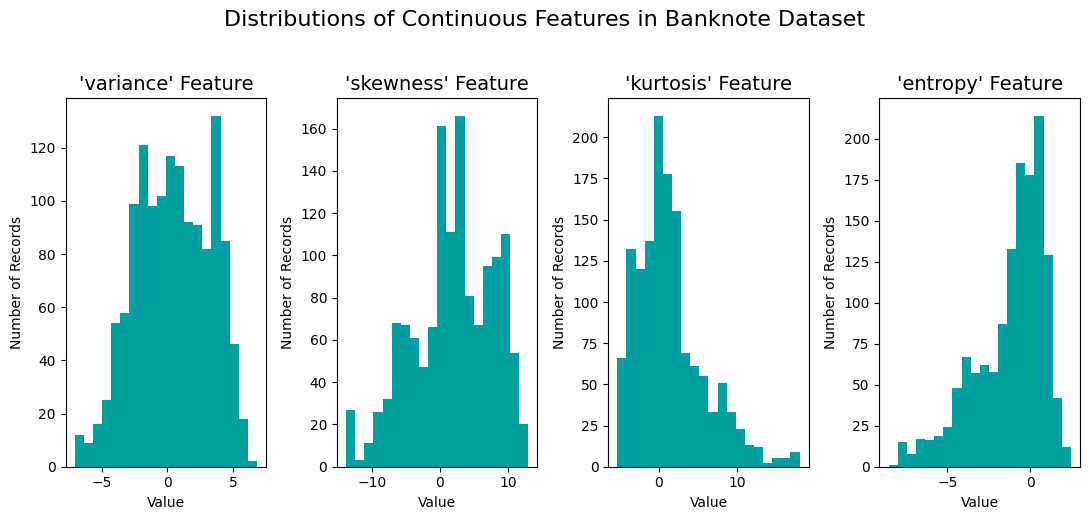

In [66]:
# feature plotting
distribution(data)

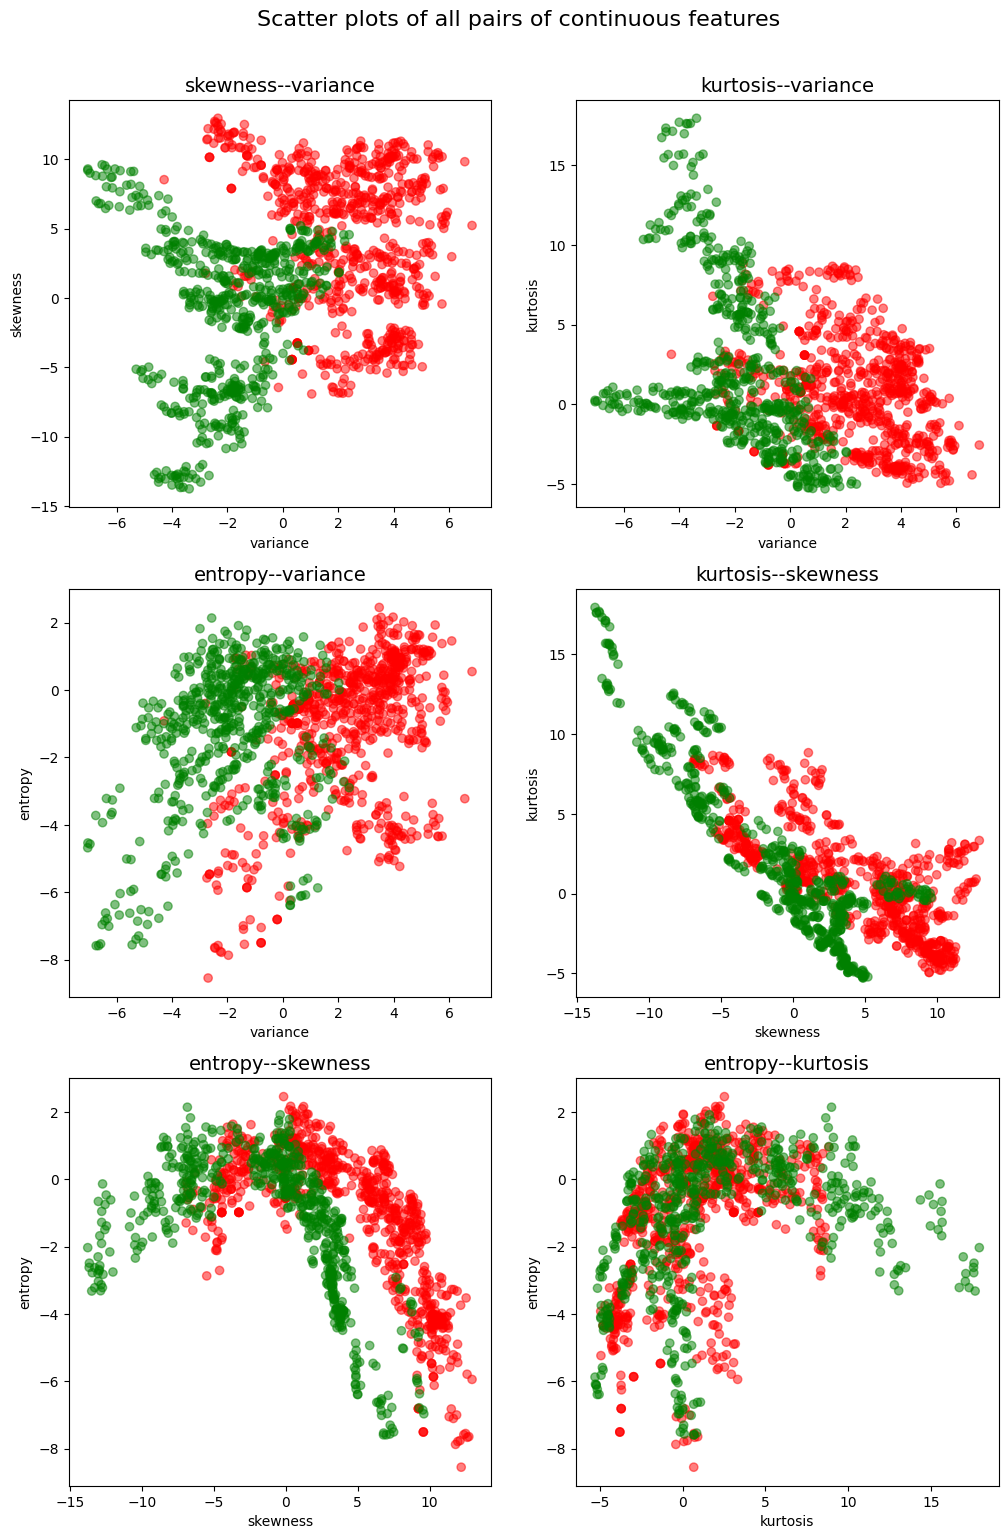

In [67]:
scatter(data)

In [68]:


from sklearn.preprocessing import MinMaxScaler
numerical = ['variance', 'skewness', 'kurtosis', 'entropy']
scaler = MinMaxScaler()
features[numerical] = scaler.fit_transform(features[numerical])

display(features.head(n = 6))



,variance,skewness,kurtosis,entropy
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362
5,0.822859,0.877275,0.057100,0.489711


In [69]:


# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'classes' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size = 0.4, random_state = 5)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))



Training set has 823 samples.
Testing set has 549 samples.


In [70]:
# Calculate Accuracy
accuracy = float(n_fake_notes)/n_records

# Calculate F-Score with beta = 2
precision = accuracy
recall = 1
beta = 2
fscore = (1 + beta ** 2) * precision * recall /(beta ** 2 * precision + recall)

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5554, F-score: 0.8620]


In [71]:
# Import necessary libraries
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test, beta=2):
    '''
    Inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from the training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
       - beta: the beta value for the F-beta score
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set,
    # then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on the test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=beta)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=beta)
    
    # Compute Confusion Matrix
    results['conf_mat'] = confusion_matrix(y_test, predictions_test)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results


In [58]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Initialize the three models
clf_A = KNeighborsClassifier(n_neighbors=5)
clf_B = SVC(random_state=5)
clf_C = GradientBoostingClassifier(random_state=5)

# Calculate the number of samples for 5%, 20%, and 100% of the training data
samples_5 = int(X_train.shape[0] * 0.05)
samples_20 = int(X_train.shape[0] * 0.2)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_5, samples_20, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test, beta=2)

print("\nTrain-Test Scores when trained on the entire training set")
for key, value in results.items():
    print("For {} Classifier, scores on the training and test set are:".format(key))
    print("Accuracy on Train set: {}".format(value[2]['acc_train']))
    print("Accuracy on Test set: {}".format(value[2]['acc_test']))
    print("F-score on Train set: {}".format(value[2]['f_train']))
    print("F-score on Test set: {}".format(value[2]['f_test']))
    print("Confusion Matrix for test set:\n{}".format(value[2]['conf_mat']))



KNeighborsClassifier trained on 41 samples.
KNeighborsClassifier trained on 164 samples.
KNeighborsClassifier trained on 823 samples.
SVC trained on 41 samples.
SVC trained on 164 samples.
SVC trained on 823 samples.
GradientBoostingClassifier trained on 41 samples.
GradientBoostingClassifier trained on 164 samples.
GradientBoostingClassifier trained on 823 samples.

Train-Test Scores when trained on the entire training set
For KNeighborsClassifier Classifier, scores on the training and test set are:
Accuracy on Train set: 1.0
Accuracy on Test set: 0.9981785063752276
F-score on Train set: 1.0
F-score on Test set: 0.999213217938631
Confusion Matrix for test set:
[[294   1]
 [  0 254]]
For SVC Classifier, scores on the training and test set are:
Accuracy on Train set: 1.0
Accuracy on Test set: 1.0
F-score on Train set: 1.0
F-score on Test set: 1.0
Confusion Matrix for test set:
[[295   0]
 [  0 254]]
For GradientBoostingClassifier Classifier, scores on the training and test set are:
Accu

/tmp/ipykernel_32/2371352530.py:69: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


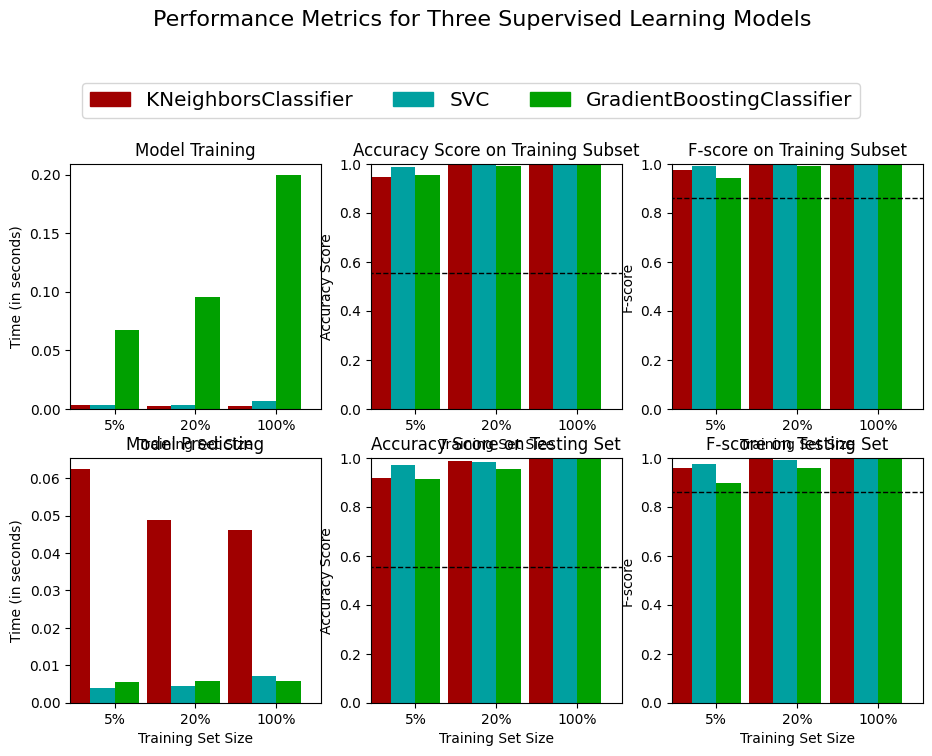

In [73]:
evaluate(results, accuracy, fscore)

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier  # Import the appropriate classifier

# Initialize the classifier
clf = KNeighborsClassifier()

# Create the parameters list you wish to tune
parameters = {'n_neighbors':[1,2,3,4,5,6], 'weights':['uniform','distance'], 'algorithm':['ball_tree','kd_tree']}

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=2)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.4, random_state=5)  # Update this line with the correct number of splits

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=cv)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = clf.fit(X_train, y_train).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-after scores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta=2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=2)))
print("\n------")
print("Following are the parameters for the optimized model")
print(grid_fit.best_params_)


Unoptimized model
------
Accuracy score on testing data: 0.9982
F-score on testing data: 0.9992

Optimized Model
------
Final accuracy score on the testing data: 0.9982
Final F-score on the testing data: 0.9992

------
Following are the parameters for the optimized model
{'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}


In [82]:


acc_scores = []
fbeta_scores = []
k_range = range(1,16)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc_scores.append(accuracy_score(y_test,y_pred))
    fbeta_scores.append(fbeta_score(y_test, y_pred, beta=2))



In [84]:
for i in range(len(acc_scores)):
    print ("{}: Accuracy is {}, f-score is {}".format(i+1,acc_scores[i], fbeta_scores[i]))

1: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
2: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
3: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
4: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
5: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
6: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
7: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
8: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
9: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
10: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
11: Accuracy is 0.9890710382513661, f-score is 0.995297805642633
12: Accuracy is 0.9890710382513661, f-score is 0.995297805642633
13: Accuracy is 0.9890710382513661, f-score is 0.995297805642633
14: Accuracy is 0.9890710382513661, f-score is 0.995297805642633
15: Accuracy is 0.9890710382513661, f-score is 0.995297805642633


In [85]:


# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state = 5)
# Train the supervised model on the training set 
model = clf.fit(X_train, y_train)

# Extract the feature importances
importances = model.feature_importances_

print ("Feature Importances with regard to Random Forest Classifier:")
print (importances)
print ("Feature Importances with regard to Gradient Boosting Classifier:")
print (clf_C.feature_importances_)



Feature Importances with regard to Random Forest Classifier:
[0.24 0.28 0.4  0.08]
Feature Importances with regard to Gradient Boosting Classifier:
[0.66918447 0.22385278 0.10323281 0.00372994]
